In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)
# 60000

len(x_test)
# 10000

# Finding the shape of individual sample
x_train[0].shape
# (28, 28)

(28, 28)

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

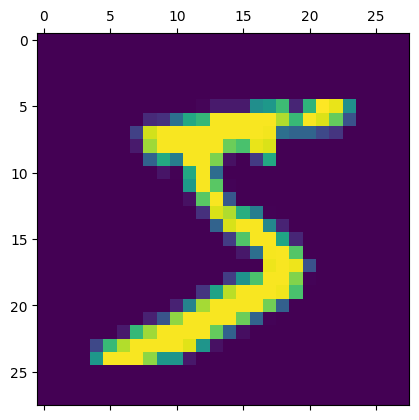

In [4]:
plt.matshow(x_train[0])


In [5]:
y_train[0]

# 5
# Show first 5 data
y_train[:5]

# array([5, 0, 4, 1, 9], dtype=uint8)

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [9]:
x_train_flattened.shape


(60000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4737 - accuracy: 0.8761
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9226
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9277
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9297
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2532 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [11]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2678 - accuracy: 0.9251


[0.2678227722644806, 0.9251000285148621]

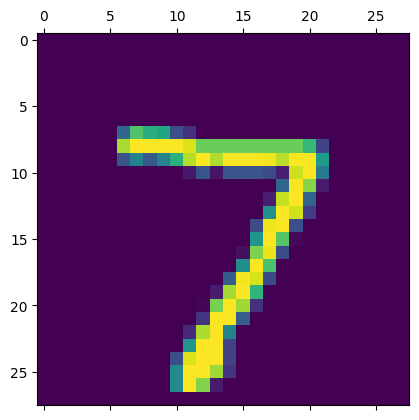

In [12]:
plt.matshow(x_test[0])

In [13]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([5.2331737e-03, 2.4339249e-08, 1.5678581e-02, 9.7379589e-01,
       1.3995110e-03, 1.4842656e-01, 5.7576422e-08, 9.9989790e-01,
       8.5317336e-02, 7.0440841e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

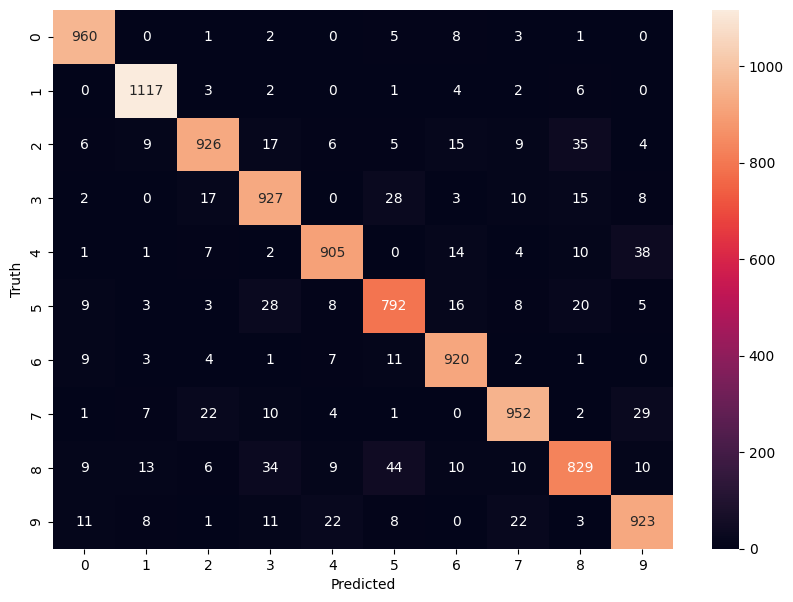

In [16]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
mat_cm=np.array(cm)
Sum= np.sum(mat_cm)
TPR= np.trace(mat_cm)
Accuracy = TPR/Sum * 100
print(Accuracy)

92.51
